# TP 3 Apprentissage Supervisé avec Sklearn
# TP 3.2. Classification  

**Objectif** : construire son prremier programme de Machine learning, une régression et une classifiction, en utilisant les modules four,is par SKlearn.

[Scikit-learn](https://scikit-learn.org/stable/index.html) offre une panoplie de méthodes d'apprentissage _ ce qui appelé estimateur. <br>
Quelle que soit la classe de la méthode (Régression, SVM, Random Forest, KNN, .....), Sklearn offre la même interface d'utilisation.

<figure>
    <img src="../images/02_sklearn_algorithms.png"  style="width:540px;height:200px;" >
</figure>

## Prise en main de SKlearn.
L'utilisation de SKlearn demande l'appel du package **sklearn.le type de modèle**  peut pas besoin de tout le package, On peut se limiter à l'estimateur ou aux estimateurs que l'on souhaite utiliser par exemple : 
sklearn.linear_model. Les phases d'utilisation d'un estimateur (**Simple**) :
1. importer le module comportant le modèle (l'estimateur) from **sklearn.linear_model import** le module par exemple  **LinearRegression**  
2. Définir/choisir un estimateur avec ses paramètres : **model=LinearRegression (...)** : 
    - avec ses éventuels paramètres
3. Entrainer le modèle sur les données X, y (divisées en 2 tableaux Numpy) : 
    -  **model.fit(X, y)**
4. Evaluer le modèle ; cette étape n'est pas nécessaire, elle calcule la performance du modèle (précision). Elle permet juste de voir si le modèle a bien appris. Un score élevé --> on arrive a retrouver les bons y pour les X correspodants--> un score faible l'inverse (<span style="color:red"> attention tout dépend de la métrique que l'on utilise)</span>
    - **model.score(X, y)** --> Il existe une panoplie de fonctions de score --> Elle n'est pas nécessaire, elle in)
4. Utiliser le modèle (pour prédire (inéferer) la valeur de nouvelles données)
    - **model.predict(X)**


# 1. Classification
Cette seconde partie traite des probèmes de classification. 
Nous travaillerons sur des données appropriées. 
- Téléchager le fichier titanic. ce fichier donne les chance de survie d'une pérsonne en fonction d'un certains nombre de critères (age, sex, ...). Visulaiser les données de ce fichier.
- Choisir un estimateur : le but est de prédire les chances de survie d'une personne en fonction des critères ci desssus.

### Le Dataset

In [1]:
# le dataset titanic 
import pandas as pd 
titanic = pd.read_csv('data/titanic.csv')

# On prend juste une partie du fichier.
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age']]
#  on regarde les chance de Survived  en fonction des autres features.
X_features=['Pclass', 'Sex', 'Age']
titanic.dropna(axis=0, inplace=True)
titanic['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()


,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


#### Préparation des données
#### Question : 
Construite le X_train et le y. La colonne survived dans y et le reste dans X ?

In [2]:
Y_train = titanic.iloc[:,0] # y_train = titanic['Survived']
X_train = titanic.iloc[:,1:] # x_train = le reste

#print le nom des colonnes de x et y
print("X_train", X_train.columns) # car c'est un dataframe ou une matrice
print("Y_train", Y_train.name) # car c'est un vecteur = série

print("X_train", X_train.shape)
print("Y_train", Y_train.shape)


X_train Index(['Pclass', 'Sex', 'Age'], dtype='object')
Y_train Survived
X_train (714, 3)
Y_train (714,)


### Choix du moèle de classifieur ?
- On va comparer deux modèles vus en cours : une regression logistique et un KNN.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

#KNN
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)

#afficher les paramètres du modèle
print("KNN", KNN.get_params())


KNN {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [4]:
#regression logistique
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

print(logistic.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Entrainement des modèles et calcul de leur score de performance ?

### Estimation des prédictions ?
Pour chacun des modèles calculer leurs prédictions ?

In [5]:
#Logistic
y_pred_log = logistic.predict(X_train)
print("y_pred_log", y_pred_log)

# on peut aussi calculer laprobabilité de survie predict_proba
model_knn = KNN.fit(X_train, Y_train)
proba=logistic.predict_proba(X_train)
print("proba", proba)

y_pred_log [0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0
 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 0 1 1

In [6]:
#KNN

y_pred_knn = KNN.predict(X_train)
print("y_pred_knn", y_pred_knn)

# on peut aussi calculer laprobabilité de survie predict_proba
proba=model_knn.predict_proba(X_train)

print("proba", proba)

y_pred_knn [0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1
 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0
 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0
 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1
 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1
 1 0 0 1 0 0 1

### Visualiser les courbes valeurs réelles versus valeurs prédites par les deux estimateurs ?
** le tracé est binaire x, y, il faut choisir la colonne que l'on visualise et la valeur de survie prédite)

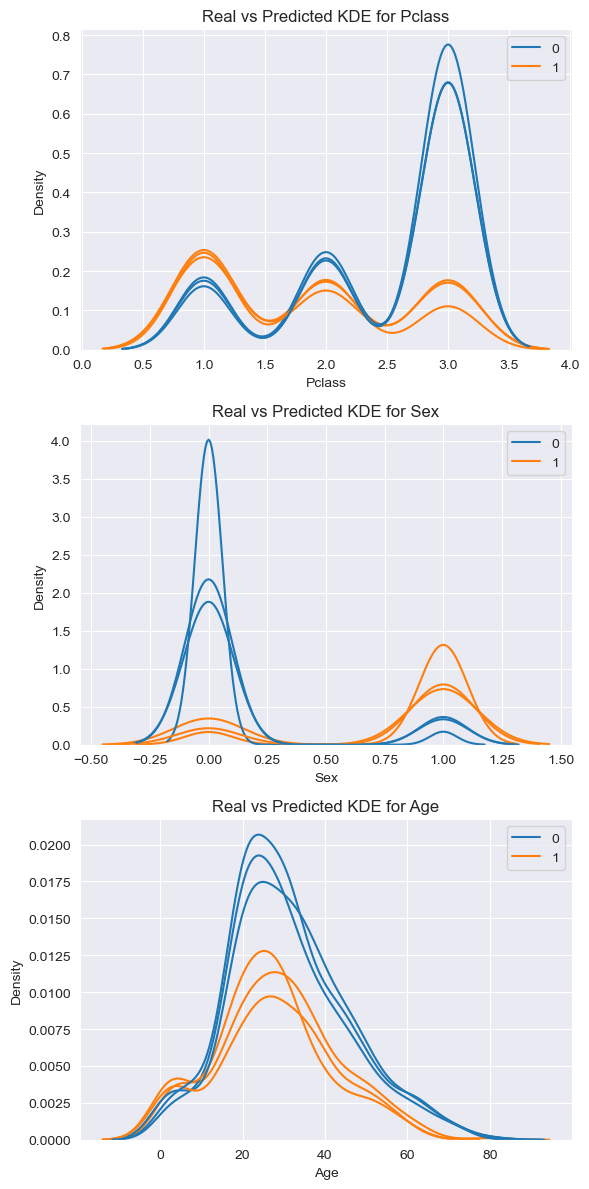

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

# Assuming you have defined X_train, Y_train, y_pred_log, y_pred_knn, and X_features earlier in your code

# Number of features
n_features = X_train.shape[1]

# Create subplots
fig, ax = plt.subplots(n_features, 1, figsize=(6, 4 * n_features))

# If there's only one feature, make sure ax is a list
if n_features == 1:
    ax = [ax]

# For each feature
for i in range(n_features):
    # Plot KDE of real values against the feature
    sns.kdeplot(x=X_train.iloc[:, i], hue=Y_train, ax=ax[i], common_norm=True, label='Real Values')# x pour absisse, hue pour ordonnée, ax représente le nombre de graphique, common_norm=False pour ne pas normaliser les données, label pour le nom de la courbe

    # Plot KDE of logistic regression predictions against the feature
    sns.kdeplot(x=X_train.iloc[:, i], hue=y_pred_log, ax=ax[i], common_norm=True, label='Logistic Regression Predictions')

    # Plot KDE of k-nearest neighbors predictions against the feature
    sns.kdeplot(x=X_train.iloc[:, i], hue=y_pred_knn, ax=ax[i], common_norm=True, label='KNN Predictions')

    ax[i].set_xlabel(X_features[i])
    ax[i].set_title(f"Real vs Predicted KDE for {X_features[i]}")

plt.tight_layout()
plt.show()


#  Exercice
Écrire un code qui permet de trouver la meilleure valeur de de $k$ (n_neighbors) pour le modèle de KNeighborsClassifier.

- faire une boucle sur plusieurs valeurs de k ( paramètre : *n_neighbors* de knn).
  - entrainer le modèle 
  - calculer son score, puis le mettre dans une liste (on garde l'hisrorique des scores)
  - sauvegarder le score et la valeur de $k$ donant le meilleur score  meilleur 
- **Plot**  les scores pour chaque valeur de $k$. 

In [8]:
# Exercice

